In [1]:
import os

import numpy as np
import torch

import matplotlib.pyplot as plt


from LFIS.config.config import get_configuration, get_baseconfig
from LFIS.LF.LF import LF_base

from LFIS.util.util import (
                    run_stat,
                    save_file,
                    load_file)

In [2]:
def check_parameter(config):
    print(f'Case: {config.case}')
    print(f'Problem: {config.problemtype}')
    print(f'Number of steps: {config.nstep}')
    print(f'Device: {config.device}')
    print(f'Number of dimension: {config.ndim}')
    print(f'Epoch: {config.train.epoch}')
    print(f'Sample size: {config.train.nsample}')
    print(f'Batch size: {config.train.nbatch}')

In [3]:
cfg = get_baseconfig()
configurer = get_configuration()

In [4]:
case = 'funnel'

In [5]:
cfg_funnel = configurer.setup_config(cfg, case)

In [6]:
check_parameter(cfg_funnel)

Case: 10-Dimensional Funnel Distribution
Problem: transform
Number of steps: 256
Device: cuda:0
Number of dimension: 10
Epoch: 10000
Sample size: 200000
Batch size: 20000


In [7]:
trainer = cfg_funnel.train.method

In [8]:
LFmodel = LF_base(cfg_funnel)
LFmodel.to(cfg_funnel.device)

LF_base(
  (flow): NN_Base(
    (layers): Sequential(
      (0): Linear(in_features=10, out_features=64, bias=True)
      (1): Sequential(
        (0): SiLU()
        (1): Linear(in_features=64, out_features=64, bias=True)
      )
      (2): Sequential(
        (0): SiLU()
        (1): Linear(in_features=64, out_features=64, bias=True)
      )
      (3): SiLU()
      (4): Linear(in_features=64, out_features=10, bias=True)
    )
  )
)

# Train LFIS

In [9]:
output = trainer(cfg_funnel)
save_file(case, output)

tensor(0.) tensor(0., device='cuda:0')
time = 0.0000, loss = 0.0000, percetage = nan%
Complete Training Flow at time 0.0000
tensor(0.0039) tensor(0.0691, device='cuda:0')
time = 0.0039, loss = 0.0229, percetage = 99.9954%
time = 0.0039, loss = 0.0001, percetage = 0.4284%


KeyboardInterrupt: 

# Load pre-trained LFIS

In [33]:
nnmodel = cfg_MG2D.nnmodel.to(cfg_MG2D.device)
output = load_file(case, nnmodel)

In [34]:
logstat = run_stat(LFmodel, output)

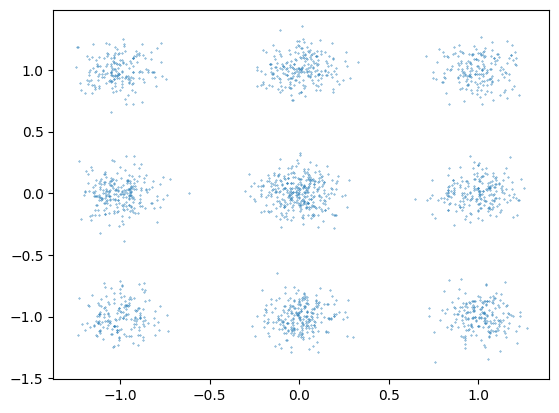

In [38]:
samples = logstat['samples']
plt.scatter(samples[:,0],samples[:,1], s = 0.1)